Load the data images from the Olivetti DatasetIntroduction to the  Olivetti Dataset:
- - Face images taken between April 1992 and April 1994.
- - There are ten different image of each of 40 distinct people- There are 400 face images in the dataset
- - Face images were taken at different times, variying ligthing, facial express and facial detail
- - All face images have black background- The images are gray level
- - Size of each image is 64x64 ( check the size with .shape)
- - Image pixel values were scaled to [0, 1] interval
- - Names of 40 people were encoded to an integer from 0 to 39*
from 0 to 39

In [1]:
import numpy as np 
faces_images = np.load('/kaggle/input/olivetti/olivetti_faces.npy')
faces_targets = np.load('/kaggle/input/olivetti/olivetti_faces_target.npy')

In [2]:
faces_images

array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
         0.3305785 , 0.30578512],
        [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
         0.338843  , 0.3140496 ],
        [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
         0.338843  , 0.29752067],
        ...,
        [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
         0.16528925, 0.17355372],
        [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033,
         0.16115703, 0.16528925],
        [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256,
         0.16115703, 0.1570248 ]],

       [[0.45454547, 0.47107437, 0.5123967 , ..., 0.19008264,
         0.18595041, 0.18595041],
        [0.446281  , 0.48347107, 0.5206612 , ..., 0.21487603,
         0.2107438 , 0.2107438 ],
        [0.49586776, 0.5165289 , 0.53305787, ..., 0.20247933,
         0.20661157, 0.20661157],
        ...,
        [0.77272725, 0.78099173, 0.7933884 , ..., 0.1446281 ,
         0.1446281 , 0.1446281 ],
        [0.7

faces_targets.shape

In [3]:
faces_images.shape

(400, 64, 64)

In [4]:
faces_targets.shape

(400,)

- we can verify the dataset informations

In [5]:
print("We have "  ,len(faces_images) , "  images in the dataset")
print("The size of each image is ",faces_images.shape[1],"x" ,faces_images.shape[2])



We have  400   images in the dataset
The size of each image is  64 x 64


* Lets try to show one of the images in the dataset 

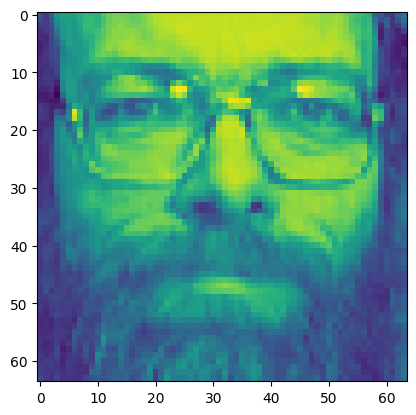

In [6]:
import matplotlib.pyplot as plt
image_alea=faces_images[360]
plt.imshow(image_alea)


* Lets try to show 10 faces of n subject from the olivetti data

[38, 19, 25, 24, 18]


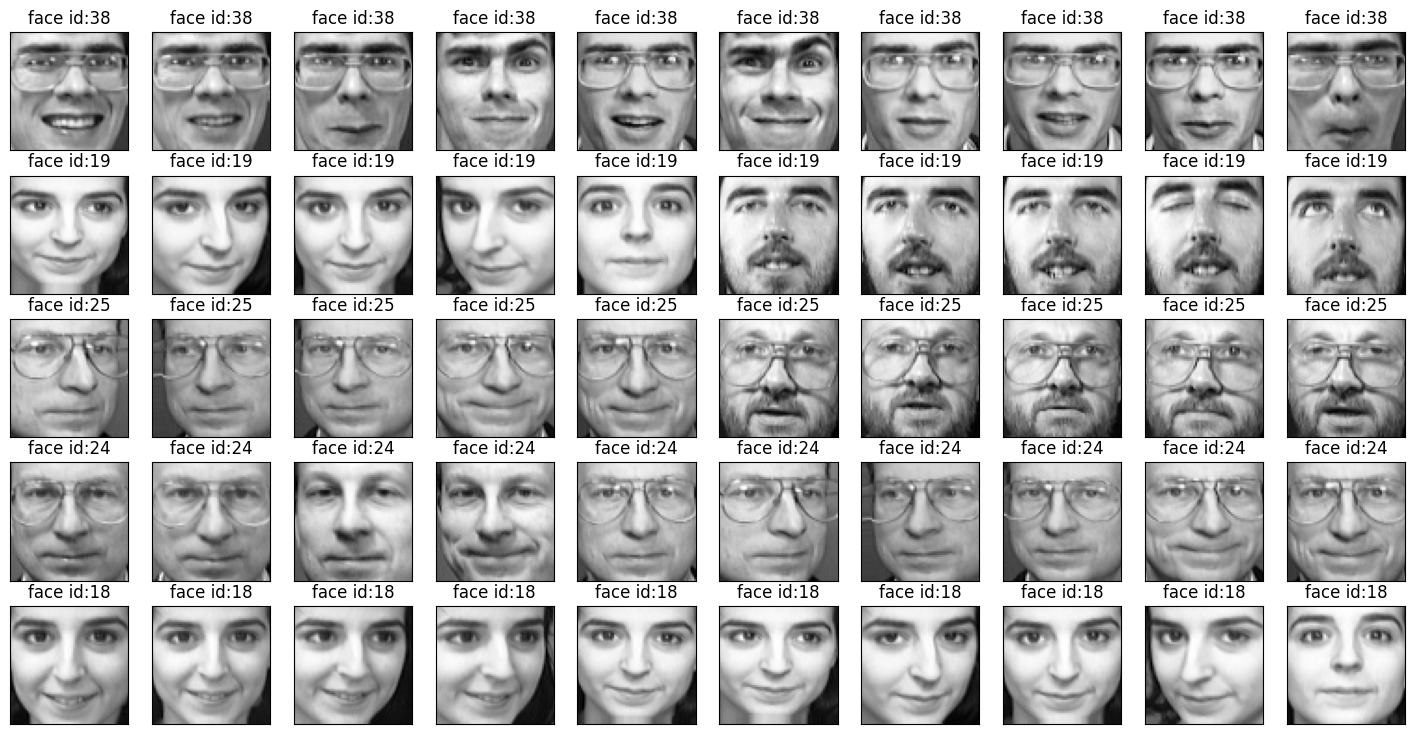

In [7]:
import random

def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*5+ j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

n =5
subject_ids = [random.randint(1, 40) for _ in range(n)]
print(subject_ids)
show_10_faces_of_n_subject(faces_images, subject_ids)
#show_10_faces_of_n_subject(images=faces_images, subject_ids=[0,5, 21, 24, 36,39])

**Faces recognition using eigenfaces and SVM**


In [8]:
from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

* Machine learning models work on vectors , but the image data is on a matrix form , so it must be converted to vector because in  Scikit-Learn, many models expect the feature matrix X to be two-dimensional with the shape (n_samples, n_features) 

In [9]:
X=faces_images.reshape((faces_images.shape[0],faces_images.shape[1]*faces_images.shape[2]))
print("X shape:",X.shape)


X shape: (400, 4096)


In [10]:
X=faces_images.reshape((faces_images.shape[0],faces_images.shape[1]*faces_images.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


In [11]:
Y = np.reshape(faces_targets, (-1, 1))
print("Y shape:",Y.shape)

Y shape: (400, 1)


* Next we split the data 70% for traning and 30% for testing .
* SO for each subject we will be having 7 training images and 3 test images 

In [12]:
X_train, X_test, y_train, y_test=train_test_split(X, faces_targets , test_size=0.25, stratify=faces_targets, random_state=42)


In [13]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (300, 4096)
y_train shape: (300,)
X_test shape: (100, 4096)
y_test shape: (100,)


In [14]:
print("Xtrain \n ",X_train)
print("\n Length of Xtrain: \n",len(X_train))
print("\n Xtest",X_test)
print("\n Length of Xtest: \n",len(X_test))
print("\n ytrain \n",y_train)
print("\n Length of ytrain: \n",len(y_train))
print("\n ytest",y_test)
print("\n Length of ytest: \n",len(y_test))

Xtrain 
  [[0.5165289  0.59917355 0.6446281  ... 0.10330579 0.0785124  0.05371901]
 [0.4338843  0.47933885 0.5206612  ... 0.661157   0.55785125 0.44214877]
 [0.41735536 0.446281   0.446281   ... 0.8016529  0.80991733 0.79752064]
 ...
 [0.13636364 0.12396694 0.10743801 ... 0.6487603  0.5785124  0.5289256 ]
 [0.5165289  0.46280992 0.28099173 ... 0.35950413 0.3553719  0.38429752]
 [0.40082645 0.35950413 0.56198347 ... 0.08677686 0.08264463 0.08677686]]

 Length of Xtrain: 
 300

 Xtest [[0.1694215  0.29338843 0.56198347 ... 0.3429752  0.36363637 0.37603307]
 [0.3305785  0.4090909  0.5495868  ... 0.6983471  0.70247936 0.59917355]
 [0.54545456 0.57438016 0.58677685 ... 0.54545456 0.17355372 0.15289256]
 ...
 [0.70247936 0.74380165 0.77272725 ... 0.21900827 0.45867768 0.6363636 ]
 [0.3140496  0.29752067 0.2768595  ... 0.4214876  0.40495867 0.3140496 ]
 [0.6859504  0.6983471  0.70247936 ... 0.3181818  0.3429752  0.3305785 ]]

 Length of Xtest: 
 100

 ytrain 
 [11 29 34 31  9 13 24 17 30 37 3

- An important step is to use the StandardScaler  , to normalize the pixel intensity, which is a crucial step in ML, especially with the use of PCA algorithm. The pixel values in images can vary greatly, and without normalization, some features could dominate the learning process while others (from darker regions) might have minimal effect. This can distort the machine learning model's understanding of the data.

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
print(X_train)

[[ 0.63295496  0.8574791   0.8492331  ... -1.1334058  -1.2307193
  -1.3634284 ]
 [ 0.17528687  0.2307407   0.21819802 ...  1.7544793   1.2945775
   0.7351842 ]
 [ 0.0837532   0.05784721 -0.16042316 ...  2.4817986   2.622535
   2.6551912 ]
 ...
 [-1.4723185  -1.6278634  -1.8852525  ...  1.690304    1.4034263
   1.204023  ]
 [ 0.63295496  0.14429395 -1.0018033  ...  0.19288222  0.22785719
   0.42262483]
 [-0.00778032 -0.3959979   0.4285429  ... -1.2189727  -1.2089496
  -1.184823  ]]


**Apply PCA to extract eigenfaces**
- Here we fit the model on the training data to learn the principal components then, we apply the same learned components to transform the test data, ensuring consistent feature representation.
- This separation prevents data leakage and ensures the test set remains unseen during training for valid evaluation.

In [17]:
n_components = 200  

print(f"Extracting the top {n_components} eigenfaces from {X_train.shape[0]} faces")
start_time = time()
pca = PCA(n_components=n_components, whiten=True, random_state=42)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
end_time = time()
time_pca = end_time - start_time
print(f"PCA fitting and transformation took {time_pca:.4f} seconds.")


Extracting the top 200 eigenfaces from 300 faces
PCA fitting and transformation took 0.8048 seconds.


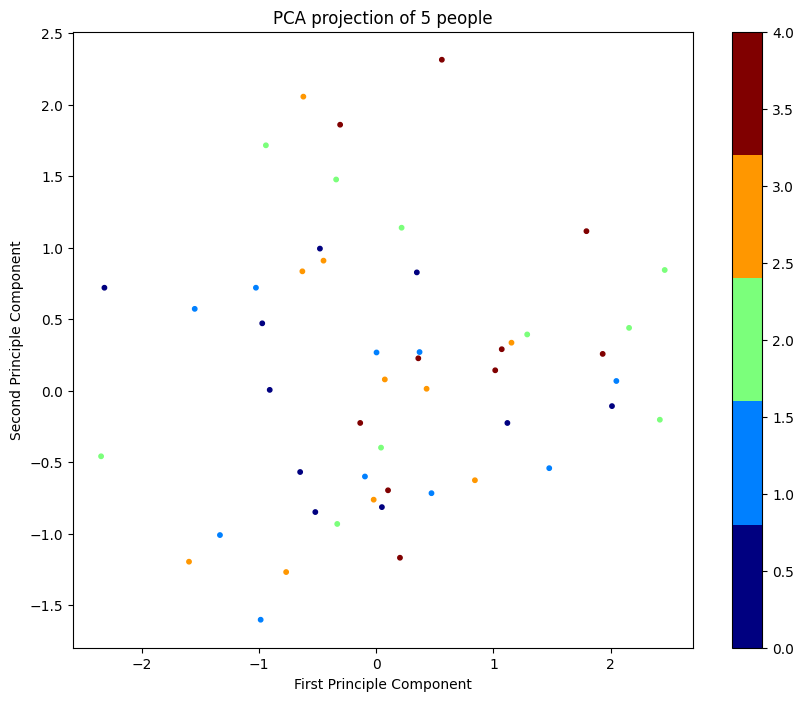

In [18]:
number_of_people=5
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_test_pca[:index_range,0],
            X_test_pca[:index_range,1], 
            c=faces_targets[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

**Train a classifier (SVM)**

In [19]:
y_train.shape

(300,)

In [20]:
from sklearn import metrics

print("Training SVM classifier : ")
clf = SVC(kernel='rbf', class_weight='balanced', C=10, gamma=0.001, random_state=42)
clf.fit(X_train_pca, y_train)
start_time = time()
y_pred = clf.predict(X_test_pca)
end_time = time()
print("Predicting people's names on the test set done in %0.3fs" % (end_time - start_time))
print("With An accuracy score: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Training SVM classifier : 
Predicting people's names on the test set done in 0.010s
With An accuracy score: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         

In [21]:
t0=time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf2 = GridSearchCV(SVC(kernel='rbf', class_weight='balanced', C=10, gamma=0.001, random_state=42), param_grid)
clf2 = clf2.fit(X_train_pca, y_train)
y_pred2=clf2.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf2.best_estimator_)


done in 4.454s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.001, random_state=42)


In [22]:

print("With An accuracy score: {:.2f}".format(metrics.accuracy_score(y_test, y_pred2)))
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))


With An accuracy score: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          16       1.00     

**Classification visualization** : The purpose of this  visualization is to  allows for a quick assessment of the model's performance by comparing the true labels with the predicted labels for a subset of test images.
By displaying both the image and the corresponding labels, one can easily identify misclassifications and gain insights into the model's accuracy.


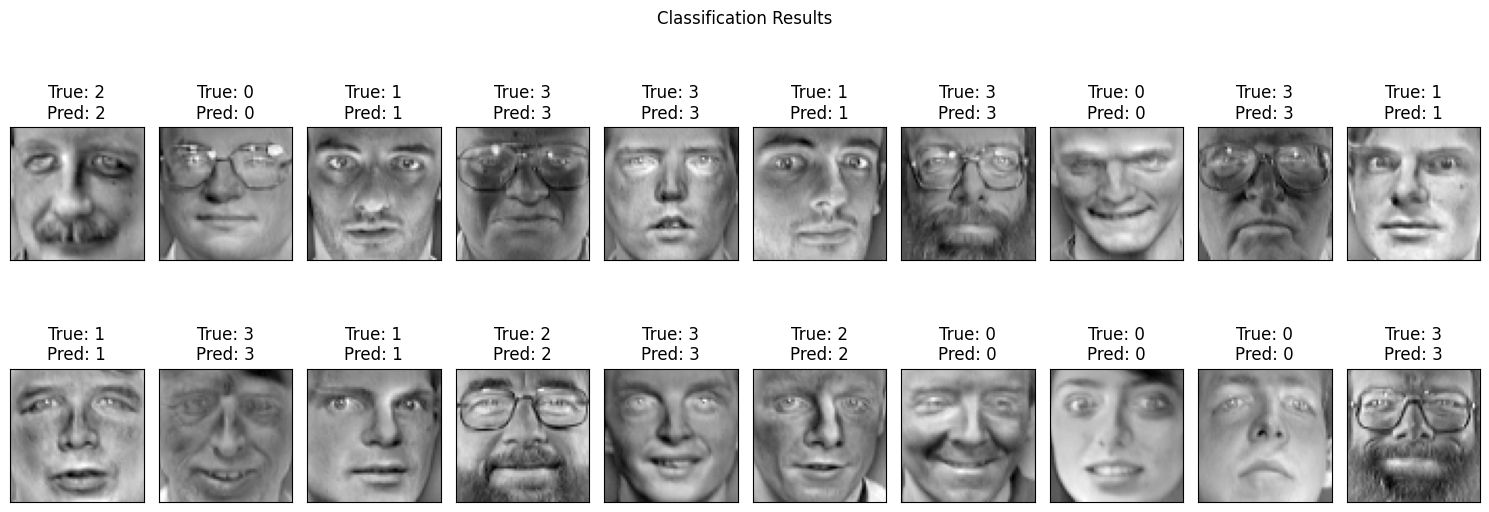

In [23]:
fig, axes = plt.subplots(2, 10, figsize=(15, 6), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    if i >= len(y_test): break
    ax.imshow(X_test[i].reshape(faces_images.shape[1], faces_images.shape[2]), cmap='gray')
    ax.set_title(f"True: {faces_targets[y_test[i]]}\nPred: {faces_targets[y_pred[i]]}")
plt.suptitle("Classification Results")
plt.tight_layout()
plt.show()

**Confusion matrix**

In [24]:
print("\n Confusion Matrix:")
confu_matrix = confusion_matrix(y_test, y_pred)
print(confu_matrix)



 Confusion Matrix:
[[2 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]


<Axes: >

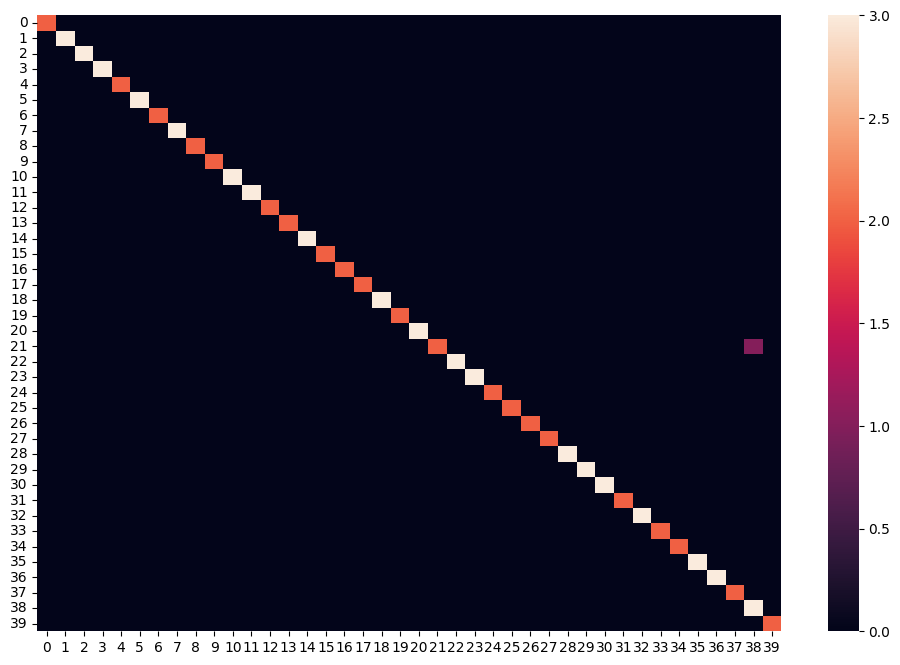

In [25]:
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

In [26]:
#We can get accuracy results of state of the art machine learning model.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier



ML_models=[]
ML_models.append(('LDA', LinearDiscriminantAnalysis()))
ML_models.append(("LR",LogisticRegression()))
ML_models.append(("NB",GaussianNB()))
ML_models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
ML_models.append(("DT",DecisionTreeClassifier()))

for name, model in ML_models:
    
    clf=model

    clf.fit(X_train_pca, y_train)
    y_pred=clf.predict(X_test_pca)
    print(10*"=","{} Result".format(name).upper(),10*"=")
    print("Accuracy score:{:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
    print()

========== LDA RESULT ==========
Accuracy score:0.99

========== LR RESULT ==========
Accuracy score:0.99

========== NB RESULT ==========
Accuracy score:0.91

========== KNN RESULT ==========
Accuracy score:0.57

========== DT RESULT ==========
Accuracy score:0.62



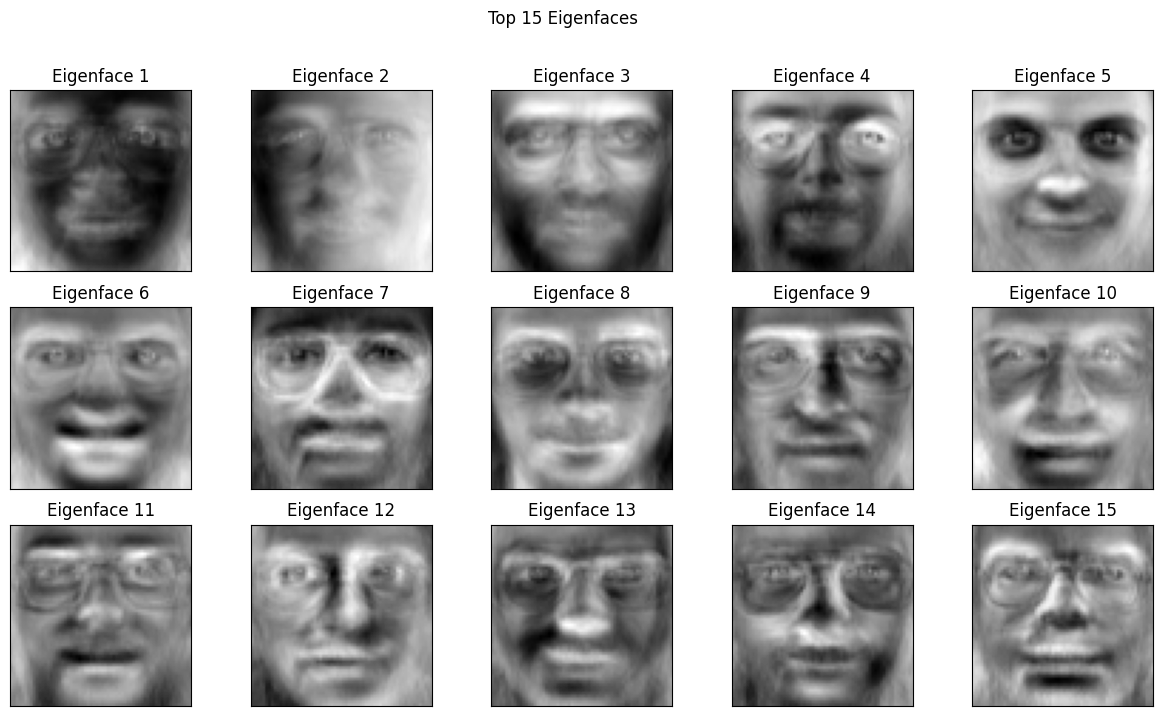

In [27]:
# Visualize eigenfaces
eigenfaces = pca.components_.reshape((n_components, faces_images.shape[1], faces_images.shape[2]))
fig, axes = plt.subplots(3, 5, figsize=(15, 8), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(eigenfaces[i], cmap='gray')
    ax.set_title(f"Eigenface {i+1}")
plt.suptitle("Top 15 Eigenfaces")
plt.show()

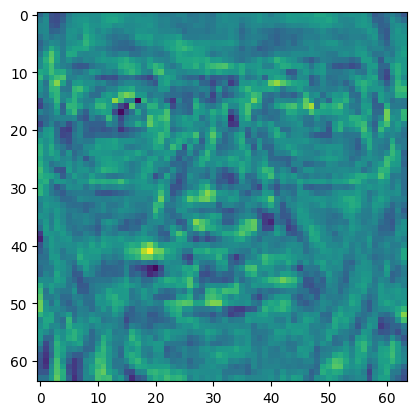

In [28]:
eigenface_alea = eigenfaces[150]
plt.imshow(eigenface_alea)